<a href="https://colab.research.google.com/github/porrale/fisicaelectronicaUTNFRA/blob/main/Ejemplo_polinomio_lagrange_y_ajuste_curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

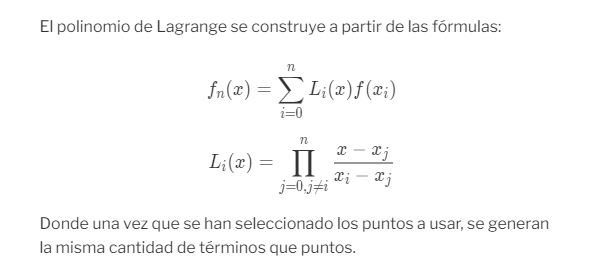

Ejemplo
Dados los 4 puntos en la tabla se requiere generar un polinomio de grado 3 de la forma:

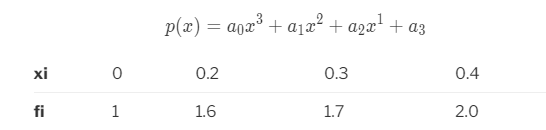

Revisando la aplicación de la fórmula se tiene que calcular tres terminos,

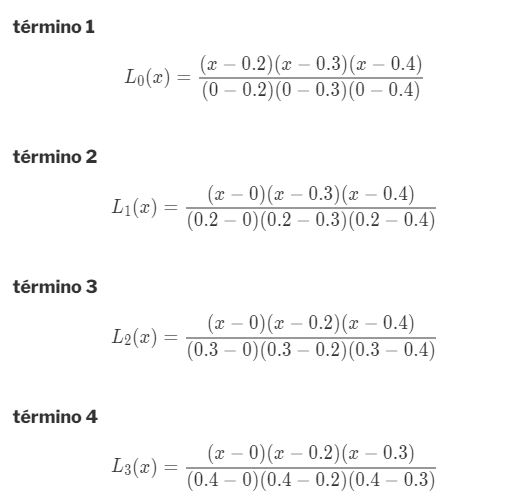

se construye el polinomio usando la fórmula para fn(x) para cada valor fi,

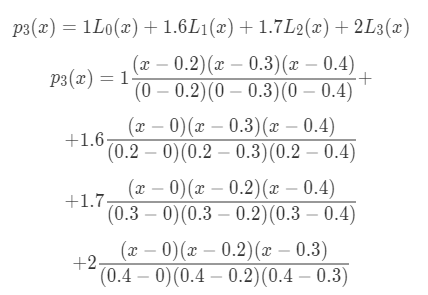

    valores de fi:  [1.  1.6 1.7 2. ]
divisores en L(i):  [-0.024  0.004 -0.003  0.008]

Polinomio de Lagrange, expresiones
400.0*x*(x - 0.4)*(x - 0.3) - 566.666666666667*x*(x - 0.4)*(x - 0.2) + 250.0*x*(x - 0.3)*(x - 0.2) - 41.6666666666667*(x - 0.4)*(x - 0.3)*(x - 0.2)

Polinomio de Lagrange: 
41.6666666666667*x**3 - 27.5*x**2 + 6.83333333333334*x + 1.0


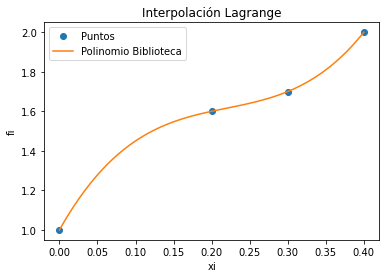

In [ ]:
# Interpolacion de Lagrange
# divisoresL solo para mostrar valores
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
#from scipy.interpolate import lagrange
#from numpy.polynomial.polynomial import Polynomial



# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
# INGRESO , Datos de prueba
xi = np.array([0, 0.2, 0.3, 0.4])
fi = np.array([1, 1.6, 1.7, 2.0])

#poly = lagrange(xi, fi)

divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
#polisimple = polinomio.expand()
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)
pfi2 = poly(pxi)

# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)
#print('Polinomio de Lagrange: Calculado con biblioteca  scipy')
#print(poly)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
#plt.plot(pxi,pfi, label = 'Polinomio')
plt.plot(pxi,pfi2, label = 'Polinomio Biblioteca')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()



Polinomio de Lagrange: Calculado con biblioteca  scipy
       3        2
41.67 x - 27.5 x + 6.833 x + 1


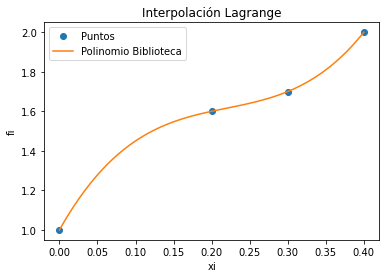

In [ ]:
# Interpolacion de Lagrange

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

xi = np.array([0, 0.2, 0.3, 0.4])
fi = np.array([1, 1.6, 1.7, 2.0])
# armo polinomio de lagrange
poly = lagrange(xi, fi)

print('Polinomio de Lagrange: Calculado con biblioteca  scipy')
print(poly)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi2, label = 'Polinomio Biblioteca')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

curve_fit

scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(- inf, inf), method=None, jac=None, **kwargs)

In [48]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

In [49]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
    

In [47]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
print(ydata)
#ydata = y



[3.3633246  2.72644728 2.49282536 2.30934472 2.50470153 1.97074773
 1.81815041 1.60765847 1.6935581  1.41154725 1.28989821 1.58630606
 1.44733062 0.96513077 1.13253319 1.14226737 1.19413426 0.4797815
 1.21415342 0.87540022 0.97490583 0.82978372 0.62150587 0.59715188
 0.90206065 1.16964712 0.51242405 0.95023457 0.41547514 0.31925313
 0.947341   0.5241944  0.66441612 0.46478909 0.76749931 0.66563559
 0.62565368 0.45837922 0.49384721 0.4163818  0.53743701 0.78103802
 0.56579103 0.40416514 0.48046458 0.50545771 0.51041068 0.58261046
 0.36393104 0.49365569]


In [42]:
popt, pcov = curve_fit(func, xdata, ydata)
popt


array([2.48940071, 1.13753298, 0.47709287])

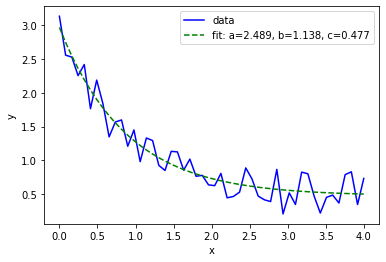

In [43]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

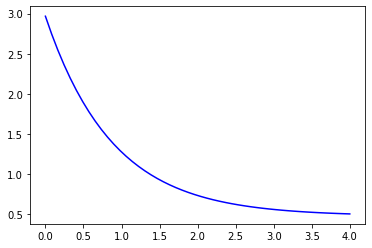

In [45]:
y = func(xdata, 2.48940071, 1.13753298, 0.47709287)
plt.plot(xdata, y, 'b-', label='data')